<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [3]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv') 
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
data_train['date']= pd.to_datetime(data_train['date'], format='%Y.%m.%d %H:%M:%S')

In [6]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Заполняем пропуски близлежащими значениями, так как по условиям задачи говорится, что значения по времени параметры часто похожи

In [7]:
data_train = data_train.fillna(method='ffill') 
data_train.isna().sum().sum()

0

In [8]:
print('Количество дубликатов в обучающей выборке:', data_train.duplicated().sum())

Количество дубликатов в обучающей выборке: 0


In [9]:
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [11]:
data_test['date']= pd.to_datetime(data_test['date'], format='%Y.%m.%d %H:%M:%S')

In [12]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [13]:
data_test = data_test.fillna(method='ffill')
data_test.isna().sum().sum()

0

In [14]:
print('Количество дубликатов в тестовой выборке:', data_test.duplicated().sum())

Количество дубликатов в тестовой выборке: 0


In [15]:
data= pd.read_csv('/datasets/gold_recovery_full_new.csv')
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [17]:
data['date']= pd.to_datetime(data['date'], format='%Y.%m.%d %H:%M:%S') 

In [18]:
data.isna().sum() 

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [19]:
data = data.fillna(method='ffill') 
data.isna().sum().sum()

0

In [20]:
print('Количество дубликатов в исходных данных:', data.duplicated().sum())

Количество дубликатов в исходных данных: 0


<div class="alert alert-info"> Все таблицы проверила на количество дубликатов, дубоикатов 0. Также выбрала выбрала стратегию заполнения пропусков близлежайшими значениями, поскольку по условиям задачи, говорится что значения по времени параметры часто похожи

*1.1* Нам даны данные, которые изначально разделены на две выборки :обучающую и тестову. В исходных данных и обучающей выборке одинаковое количество признаков - 87. В тестовой выборке 53 признака. Тип объектов float, у столбца date тип object поменяла его на datetime. Также есть пропуски, которые необходимо обработать. Так как соседние параметры по времени часто похожи, то пропуски заполню схожими параметрами.

In [21]:
c=data_train['rougher.output.concentrate_au'] 
f=data_train['rougher.input.feed_au'] 
t=data_train['rougher.output.tail_au'] 
recovery=((c*(f-t))/(f*(c-t)))*100 
print('MAE:',mean_squared_error(data_train['rougher.output.recovery'], recovery))

MAE: 2.1779764378612226e-28


*1.2* Средняя абсолютная ошибка очень мала и стремится к нулю, соответственно расчеты верны и расчеты почти совпадают с признаком.

In [22]:
deleted_features= set(data_train.columns) - set(data_test.columns)
print('Количество отсутствующих признаков в тестовой выборке', len(deleted_features))
deleted_features

Количество отсутствующих признаков в тестовой выборке 34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [23]:
data_test= data_test.merge(data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

*1.3* В тестовой выборке не хватает финальных характеристик, параметров продукта после первичной очистки, рачетных характеристик флотации, доля концентрации металлов после флотации  и доля концентрации металлов после второй очистки. Все они принадлежат типу float. Также отсутствуют целевые признаки:'final.output.recovery', 'rougher.output.recovery'. Их надо добавить в тестовую выбурку, они понадобятся для обучения модели. 

<div class="alert alert-info">  V2. Промежуточный вывод: В процессе подготовки данных, были изучены три датасета :исходные данные, обучающая выборка и тестовая выборка. Тип данных в столбце'date' поменяла с object на datetime, в остаьных столбцах тип данных соответствует. Дубликаты обнаружены не были. Рассчитала mae, и увидела, что эффективность обогащения расчитана правильно. Заметила что в тестовой выборке отсутствуют целевые признаки, добавила их. Также обработала пропуски близлежащими значениями. 

## Анализ данных

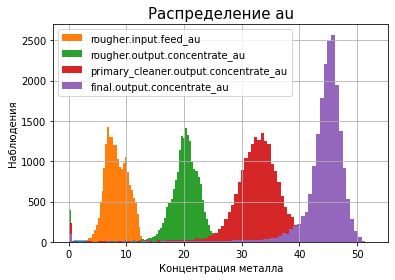

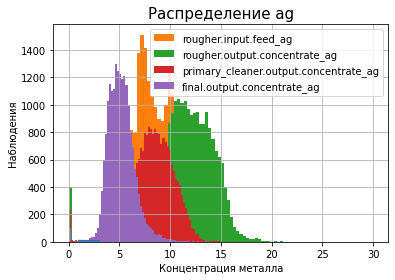

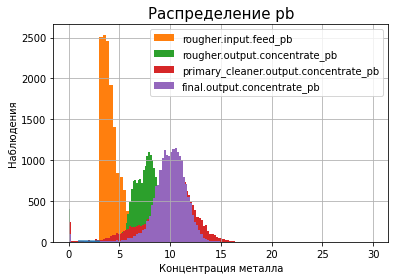

In [24]:
for metal in ['au', 'ag', 'pb']: # посмотрим как менятся концентрация металлов с помощью гистограмм
    fig, axes = plt.subplots()
    axes.plot([1, 2, 3], [9, 8, 7])
    plt.title(f'Распределение {metal}', fontsize=15)
    data[f'rougher.input.feed_{metal}'].hist(bins=80, range=(3, 30),legend=True)
    data[f'rougher.output.concentrate_{metal}'].hist(bins=80,legend=True)
    data[f'primary_cleaner.output.concentrate_{metal}'].hist(bins=80,legend=True)
    data[f'final.output.concentrate_{metal}'].hist(bins=80,legend=True)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Наблюдения')   

*2.1* Для того чтобы посмотреть как менялась концентрация золота, серебра и свинца на различных этапах очистки я построила гистограммы. По ним видно, что концентрация золота на финальном этапе резко увеличивается, на остальных же этапах концентрация практически одинакова. Конценнтрация серебра уменьшается после флотации и достигает минимума на послепервичной очистки. Концентрация же свинца высокая в сыром продукте и резко уменьшается после флотации.

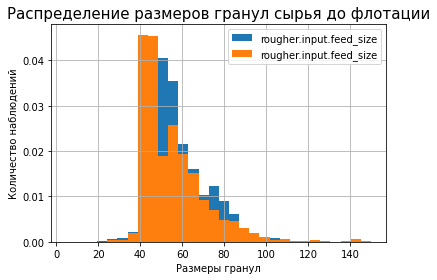

In [25]:
fig, axes = plt.subplots() 
plt.title(f'Распределение размеров гранул сырья до флотации', fontsize=15)
data_train['rougher.input.feed_size'].hist(bins=30, range=(5, 150),legend=True, density=True)
data_test['rougher.input.feed_size'].hist(bins=30, range=(5, 150),legend=True, density=True)
plt.xlabel('Размеры гранул')
plt.ylabel('Количество наблюдений')
plt.show()

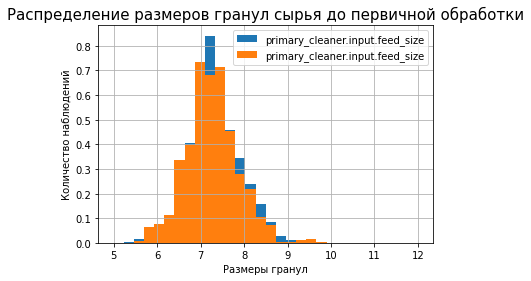

In [26]:
fig, axes = plt.subplots() 
plt.title(f'Распределение размеров гранул сырья до первичной обработки', fontsize=15)
data_train['primary_cleaner.input.feed_size'].hist(bins=30, range=(5, 12),legend=True, density=True)
data_test['primary_cleaner.input.feed_size'].hist(bins=30, range=(5, 12),legend=True, density=True)
plt.xlabel('Размеры гранул')
plt.ylabel('Количество наблюдений')
plt.show()

*2.2* Распределение гранул в обучающей и тестовой выборках похожи

In [27]:
data['sum_rougher_input']=data['rougher.input.feed_ag']+data['rougher.input.feed_au']+data['rougher.input.feed_pb']+data['rougher.input.feed_sol']
data['sum_rougher_output']=data['rougher.output.concentrate_ag']+data['rougher.output.concentrate_au']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_sol']
data['sum_final_output']=data['final.output.concentrate_ag']+data['final.output.concentrate_au']+data['final.output.concentrate_pb']+data['final.output.concentrate_sol']

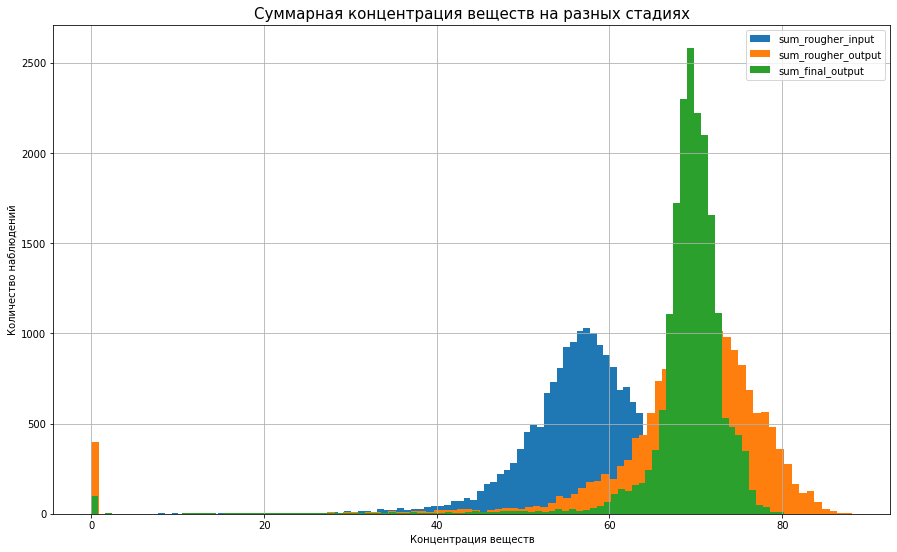

In [28]:
plt.figure(figsize=[15, 9])
plt.title(f'Суммарная концентрация веществ на разных стадиях', fontsize=15)
data['sum_rougher_input'].hist(bins=100,legend=True)
data['sum_rougher_output'].hist(bins=100,legend=True)
data['sum_final_output'].hist(bins=100,legend=True)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.show()

In [29]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0) & (data_train['rougher.output.concentrate_pb'] != 0) & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0) & (data_train['final.output.concentrate_pb'] != 0) & (data_train['final.output.concentrate_sol'] != 0)]
data = data[(data['rougher.output.concentrate_au'] != 0) & (data['rougher.output.concentrate_ag'] != 0) & (data['rougher.output.concentrate_pb'] != 0) & (data['rougher.output.concentrate_sol'] != 0)]
data = data[(data['final.output.concentrate_au'] != 0) & (data['final.output.concentrate_ag'] != 0) & (data['final.output.concentrate_pb'] != 0) & (data['final.output.concentrate_sol'] !=0)]

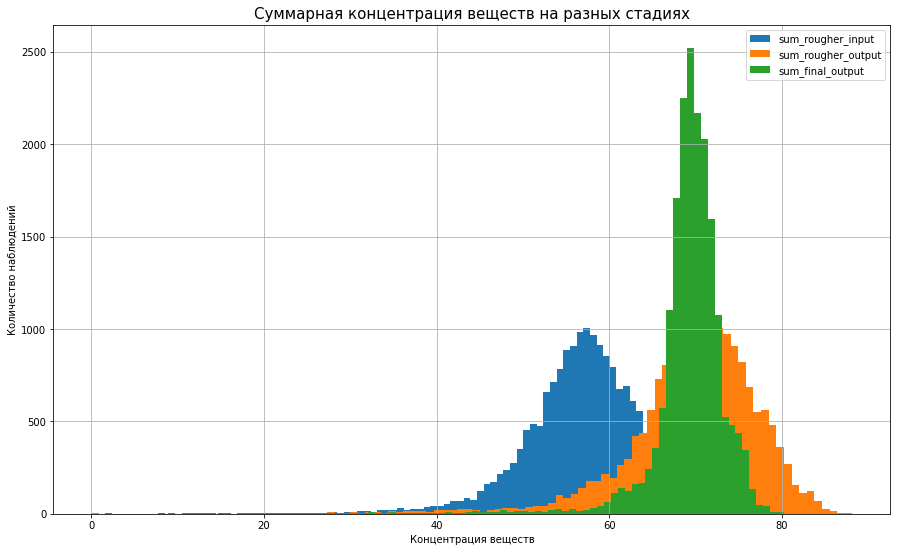

In [30]:
plt.figure(figsize=[15, 9])
plt.title(f'Суммарная концентрация веществ на разных стадиях', fontsize=15)
data['sum_rougher_input'].hist(bins=100,legend=True)
data['sum_rougher_output'].hist(bins=100,legend=True)
data['sum_final_output'].hist(bins=100,legend=True)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.show()

*1.3* Суммарная концентрация сырья уменьшается на финальном этапе

При анализе данных были построены несколько графиков, я посмотрела как меняется концентрация золота, серебра и свинца на различных этапах. Анализ показал, что концентрация золота на финальном этапе увеличивается, так и должно быть, ведь мы именно этого и добиваемся. Также распределение гранул в обучающей и тестовой выборках похожи, а значит наша модель долна работать корректно. Также увидела, что в данных есть аномалии(суммарная концентрация веществ равна нулю), удалила эти значения, так как эти данные могут повлиять на корректность модели.

## Модель

In [31]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

In [32]:
deleted_features_train = deleted_features - set(['rougher.output.recovery','final.output.recovery'])
data_train = data_train.drop(columns=deleted_features_train, axis=1)

In [33]:
def find_smape(target, predict):
    return (1/len(target))*sum(abs(target - predict)/(abs(target + predict)/2)*100)

In [34]:
def s_mape(rougher,final): 
    return ((0.25*rougher)+(0.75*final))

In [35]:
smape_score = make_scorer(find_smape, greater_is_better=False)

In [36]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train = data_train['rougher.output.recovery']
target_train_final= data_train['final.output.recovery']

In [38]:
%%time
for depth in range(1, 10): 
    for min_sample in range(1,10):
        model_d_rou = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min_sample, random_state=12345)
        model_d_scores = cross_val_score(model_d_rou,
                              features_train,
                              target_train,
                              scoring=smape_score,
                              cv=3)
        model_d_score = model_d_scores.mean()
        model_d_f = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min_sample, random_state=12345)
        model_d_f_scores = cross_val_score(model_d_f,
                              features_train,
                              target_train_final,
                              scoring=smape_score,
                              cv=3)
        model_d_f_score = model_d_f_scores.mean()
print('sMape rougher:', model_d_score*(-1))
print('sMape final:', model_d_f_score*(-1))
print('Итоговая оценка качества:', s_mape(model_d_score, model_d_f_score)*(-1))


sMape rougher: 8.30313794883881
sMape final: 12.316180992648896
Итоговая оценка качества: 11.312920231696374
CPU times: user 1min 38s, sys: 118 ms, total: 1min 38s
Wall time: 1min 38s


In [39]:
for est in range(50, 100, 10):
    for depth in range(1,15,3):
        model_f_rou= RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_f_scores = cross_val_score(model_f_rou,
                              features_train,
                              data_train['rougher.output.recovery'],
                              scoring=smape_score,
                              n_jobs=-1,
                              verbose=10,           
                              cv=3)
        model_f_score = model_f_scores.mean()
        model_f_f = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_f_f_scores = cross_val_score(model_f_f,
                              features_train,
                              data_train['final.output.recovery'],
                              scoring=smape_score,
                              n_jobs=-1,
                              verbose=10,
                              cv=3)
        model_f_f_score = model_f_f_scores.mean()
print('sMape rougher:', model_f_score*(-1))
print('sMape final:', model_f_f_score*(-1))
print('Итоговая оценка качества:', s_mape(model_f_score, model_f_f_score)*(-1))

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.923) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ............................... score: (test=-7.790) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.782) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.378) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.948) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] END .............................. score: (test=-11.503) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.974) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] END ............................... score: (test=-6.869) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.523) total time=   5.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.170) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.640) total time=   5.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   10.9s remaining:    0.0s


[CV] END .............................. score: (test=-13.874) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.968) total time=   8.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.829) total time=   8.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.413) total time=   8.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.101) total time=   8.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.745) total time=   8.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.626) total time=   8.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.428) total time=  11.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.528) total time=  10.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.980) total time=  10.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.731) total time=  11.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.662) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s


[CV] END .............................. score: (test=-12.338) total time=  11.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.209) total time=  13.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] END ............................... score: (test=-6.585) total time=  12.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.460) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.814) total time=  13.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.629) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.401) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.972) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] END ............................... score: (test=-7.796) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.752) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.368) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.940) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] END .............................. score: (test=-11.503) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.955) total time=   6.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.891) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.473) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.149) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.690) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s


[CV] END .............................. score: (test=-13.804) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.883) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] END ............................... score: (test=-7.078) total time=   9.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.402) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.052) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.831) total time=   9.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.583) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.390) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.689) total time=  12.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.010) total time=  12.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.644) total time=  13.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.747) total time=  13.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.3s remaining:    0.0s


[CV] END .............................. score: (test=-12.278) total time=  13.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.158) total time=  15.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.720) total time=  15.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.399) total time=  15.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.820) total time=  16.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.661) total time=  15.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.383) total time=  16.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.942) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] END ............................... score: (test=-7.796) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.707) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.368) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.930) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] END .............................. score: (test=-11.495) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.959) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] END ............................... score: (test=-6.804) total time=   7.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   14.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.510) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.131) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.666) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   14.5s remaining:    0.0s


[CV] END .............................. score: (test=-13.850) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.886) total time=  12.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.995) total time=  11.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   23.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.473) total time=  11.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.051) total time=  11.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.792) total time=  11.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   23.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.484) total time=  11.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.349) total time=  15.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV] END ............................... score: (test=-6.628) total time=  15.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.210) total time=  15.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.654) total time=  15.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.667) total time=  15.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.183) total time=  15.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.083) total time=  18.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.654) total time=  18.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   37.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.582) total time=  18.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.890) total time=  19.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.596) total time=  18.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   37.7s remaining:    0.0s


[CV] END .............................. score: (test=-12.307) total time=  19.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.949) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-7.791) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.703) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.372) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.923) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[CV] END .............................. score: (test=-11.494) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.957) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.815) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.472) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.119) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.649) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s


[CV] END .............................. score: (test=-13.836) total time=   8.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.868) total time=  13.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] END ............................... score: (test=-6.950) total time=  13.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.423) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.099) total time=  13.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.711) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.8s remaining:    0.0s


[CV] END .............................. score: (test=-12.327) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.347) total time=  17.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.576) total time=  17.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   35.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.183) total time=  17.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.770) total time=  17.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.647) total time=  17.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   35.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.100) total time=  18.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.089) total time=  21.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.639) total time=  20.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   42.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.550) total time=  21.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.920) total time=  21.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.585) total time=  21.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   43.2s remaining:    0.0s


[CV] END .............................. score: (test=-12.258) total time=  21.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.932) total time=   2.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.788) total time=   2.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.694) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.372) total time=   2.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.927) total time=   2.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] END .............................. score: (test=-11.491) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.963) total time=   9.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.816) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.544) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.104) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.645) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.2s remaining:    0.0s


[CV] END .............................. score: (test=-13.862) total time=   9.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.875) total time=  15.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.900) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.1s remaining:    0.0s


[CV] END ............................... score: (test=-8.579) total time=  14.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.073) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.709) total time=  14.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   29.7s remaining:    0.0s


[CV] END .............................. score: (test=-12.260) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.380) total time=  20.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.537) total time=  19.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   39.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.325) total time=  19.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.706) total time=  20.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.711) total time=  19.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   39.8s remaining:    0.0s


[CV] END .............................. score: (test=-12.078) total time=  20.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.122) total time=  24.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.609) total time=  23.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   47.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.626) total time=  24.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.884) total time=  24.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.651) total time=  23.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   48.2s remaining:    0.0s


[CV] END .............................. score: (test=-12.256) total time=  24.3s
sMape rougher: 8.119018344831309
sMape final: 10.59701264086313
Итоговая оценка качества: 9.977514066855175


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


По итогу кросс-валидации лучшей моделью оказался решающий лес, его будем тестировать на тестовой выборке.

In [40]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1) 
target_test = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [44]:
model_test_rou = RandomForestRegressor(n_estimators=75, max_depth=5, random_state=12345) 
model_test_rou.fit(features_train, target_train)
predicted_rou = model_test_rou.predict(features_test)
model_test_f = RandomForestRegressor(n_estimators=75, max_depth=5, random_state=12345)
model_test_f.fit(features_train, target_train_final)
predicted_f = model_test_f.predict(features_test)
smape_test_rou = find_smape(target_test, predicted_rou)
smape_test_f = find_smape(target_test_final, predicted_f)
final_smape_test = s_mape(smape_test_rou, smape_test_f)
print('sMape rougher:', smape_test_rou)
print('sMape final:', smape_test_f)
print('Итоговая оценка качества:', final_smape_test)

sMape rougher: 8.331959322740486
sMape final: 9.718325586824573
Итоговая оценка качества: 9.371734020803551


In [45]:
dummy_reg_rou=DummyRegressor(strategy='median') 
dummy_reg_rou.fit(features_train, target_train)
d_r_p = dummy_reg_rou.predict(features_test)
smape_d_r = find_smape(target_test, d_r_p)
dummy_reg_f=DummyRegressor(strategy='median')
dummy_reg_f.fit(features_train, target_train_final)
d_f_p = dummy_reg_f.predict(features_test)
smape_d_f = find_smape(target_test_final, d_f_p)
final_smape_d = s_mape(smape_d_r , smape_d_f)
print ('sMape константной модели флотация:', smape_d_r)
print ('sMape константной модели финал:', smape_d_f)
print('Итоговая оценка качества для константной модели:', final_smape_d)

sMape константной модели флотация: 8.525829420292219
sMape константной модели финал: 9.742772243029064
Итоговая оценка качества для константной модели: 9.438536537344852


Вывод: в процессе работы изучены данные, проведен исследовательский анализ данных. Также обучены несколько моделей. С помощью метрики sMape выбрана лучшая модель и протестирована на тестовой выборке. Лучшая водель получилаь случайный лес, она даёт самый менимальный результат sMape. Также проверна модель на адекватность, результат тестирования выше, чем на константной модели.